# 158.755 Data Science - Making Sense of Data Project 4
# Study In Recommender Engine

## 1.0 Abstract

A recommender system, or a recommender engine intends to seek prediction of 'rating' or 'preference' for a user that would rank an item or event, mainly used in commercial web applications. 

They have been utilized in various areas over the last ten years, commonly used as playlist generators for video and music services such as Youtube, Netflix, and BiliBili, product recommenders like Amazon, Trademe, and Ebay, and content or news based recommenders for social media platforms as Facebook, Twitter and Instergram. Also, there are other popular recommender systems being utilized for specific topics as hotels booking, dating matching, and online competition game team up.

Flow and monetization are the core concept associated with commercial web applications for internet. Simply speaking, flow is the measurement that the number of visitings for a web application, while monetization evaluates its overall income for keeping the business up and running continuously and healthily. (i.e. advertisement income of Youtube, membership subscriptions for Netflix, and fees/charges for each successfully sale for Amazon ). 

Therefore, recommendation engine is one of the key part for monetization that allows finding consumers' real demand through directing them to their most interest items or services. In addition to this , owners of commercial web applications, would be able accurately deploy advertisements and services to their customers based on a successful recommendation engine set up, for example ,playlist generators (Youtube) could generate just right advertisements to their viewers , and product recommenders like Amazon could pushed customers related products when they are viewing a certain item. Thus, it would optimise the resource usage and amplify income for a commercial organisation who has developed such kind of commercial web applications. 

In this project , we would implement a ***'breath first'*** strategy so as to explore as much lifecycle and implementations for a recommendation engine , such as the input and output data structure, machine learning algorithms, evaluation standard for comparison of different algorithms, and its position and role in architecture of a commercial web applications , instead of undertaking ***in-depth*** research on specific algorithms as per their theory and implementations. Thus, we will simply use an existing library to compute our findings and recommendations for this project.



## 2.0 Indroduction


## 3.0 Data Collection

The datasets for a commercial web application have almost never been exposed for public usage or research, as they are private and strategy assets for business. Normally they are generated through 

Fortunately, there are existing web source regarding recommendation engine study for us to play with , which is Amazon product data prepared by Associate Professor Julian McAuley, UCSD at http://jmcauley.ucsd.edu/data/amazon/.

Normally, user activates for a commercial web app could be concluded as viewing a certain web page , purchasing products, comments and rank items , content or news etc. It is quite difficult to summarise a standard data structure for a recommendation engine due to the variety demands and requirements for various business activities.

However, a classic data structure format has been widely used after long term experimentation and operation with major internet giant companies such as Amazon and Facebook:

- ***user id*** : unique user id
- ***item id*** : unique item id
- ***behaviour type*** : type of behaviour , i.e. purchase or view an item
- ***context*** : behaviour context, including location and time etc.
- ***behaviour weight*** : weight could be the viewing length for a video or rank for an item 
- ***behaviour content*** : if a user comments something, the content could be saved as a text file. If user click an item, the content could be a binary input.


### 3.1 Web API

Amazon Instant Video review data , http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Amazon_Instant_Video_5.json.gz , has been selected as the dataset for this project. 




### 3.2 Web Crawling

## 4.0 EDA

## 5.0 Algorithm Research

As there are many approaches to implement recommender engine, such as Collaborative filtering, Content-based filtering, Multi-criteria recommender systems etc. Their brief concept and implementations could be refer to 
https://en.wikipedia.org/wiki/Recommender_system.

In this project , we would use an existing library named as ***SurPRISE***, stands for ***Simple Python RecommendatIon System Engine.***,http://surpriselib.com/.

As it has provided various ready-to-use prediction algorithms with good documentation and use cases, such as baseline algorithms, neighborhood methods, matrix factorization-based ( SVD, PMF, SVD++, NMF), and many others. Also, various similarity measures (cosine, MSD, pearson…) are built-in.

In this section ,we will mainly focus on Collaborative filtering based algorithms ,***matrix factorization-based modules and similarity modules***.


### 5.1 Input Data Structure

The input data structure is very simple , just a big user - item with rating matrix , that is represented as a specific user ranks an item with certain rating as per the code below:

In [4]:
#full dataset for research
df = pd.read_csv('full_dataset.csv')

In [8]:
df.head()

,userID,itemID,rating
0,A1HP7NVNPFMA4N,0700026657,5
1,A1JGAP0185YJI6,0700026657,4
2,A1YJWEXHQBWK2B,0700026657,3
3,A2204E1TH211HT,0700026657,2
4,A2RF5B5H74JLPE,0700026657,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 3 columns):
userID    497577 non-null object
itemID    497577 non-null object
rating    497577 non-null int64
dtypes: int64(1), object(2)
memory usage: 11.4+ MB


### 5.2 Performance measures

The commonly used metrics are the ***Mean Absolute Error(MAE)*** and ***Root Mean Squared Error(RMSE)***,  ***precision*** and ***recall*** will also be used to evaluate the quality of a model for comparison. 

However, these classic evaluation measures are highly criticized. It has been seen that results of offline measures have low correlation with results from user activities or oneline tests (A/B tests). This is probably because the online recommender engine is a static model as the user behaviour being updated continuously.

In this project ,we would just use classic evaluation measures to compare different machine learning models since we don't have real online enviroment to implement A/B tests.

##  6.0 Matrix Factorization-Based Modules

In [5]:
%run report_helpers.ipynb

### 6.1 SVD

The famous SVD algorithm, which was popularized by Simon Funk during the Netflix Prize in 2006. It's documentation and reference could be referred to links as below:

https://sifter.org/~simon/journal/20061211.html

https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD

SVD is stand for singular value decomposition mathmatically, is a factorization of a real or complex matrix that generalizes the eigendecomposition of a square normal matrix to any m × n matrix via an extension of the polar decomposition. 

Actually , it is dry and headache to focus on the mathmatical details for this algorithm, ***SurPRISE*** lib has encapsulated ready to use functions to implement this approach.

The code below has followed a standard machine learning process , which has iterated through all combinations of parameters in ***param_grid*** variable with K folds method (3 folds), so as to find the best prediction model based on RMSE and MAE score.

***{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.2}*** parameters have been found as the best score model for this approach


In [2]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('full_dataset.csv')
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

In [2]:


#choose various parameters for model
param_grid = {'n_epochs': [5, 10,15], 'lr_all': [0.002, 0.005,0.01],
              'reg_all': [0.2, 0.4, 0.6]}

#iterate thorugh parameter grid to find best model
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print('best RMSE score')
print(gs.best_score['rmse'])
print('best MAE score')
print(gs.best_score['mae'])
# combination of parameters that gave the best RMSE score
print('combination of parameters that gave the best RMSE score')
print(gs.best_params['rmse'])
print('combination of parameters that gave the best MAE score')
print(gs.best_params['mae'])

best RMSE score
1.026267071934603
best MAE score
0.761404237027621
combination of parameters that gave the best RMSE score
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.2}
combination of parameters that gave the best MAE score
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.2}


Once the best SVD model has been selected , the ***precision@k and recall@k*** could be computed with 5 folds method. As their results are very close, we could justify that data are distributed with not much outliers.

In [3]:
kf = KFold(n_splits=5)
#best algo based on above
algo = gs.best_estimator['rmse']
i = 0
#print precision@k and recall@k
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)
    
    # Precision and recall can then be averaged over all users
    print('precision@k for folder ' + str(i) )
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall@k for folder ' + str(i) )
    print(sum(rec for rec in recalls.values()) / len(recalls))
    i += 1
    

precision@k for folder 0
0.9048545025109515
recall@k for folder 0
0.8115955212411249
precision@k for folder 1
0.905355953228735
recall@k for folder 1
0.8102013341283134
precision@k for folder 2
0.9056486204942034
recall@k for folder 2
0.8119031242068613
precision@k for folder 3
0.9030259586344004
recall@k for folder 3
0.8124310026279398
precision@k for folder 4
0.9055092241597175
recall@k for folder 4
0.8107083060070126


We can use the code below to save this model for future reuse.

In [15]:
#save the model for later use
dump.dump(os.path.expanduser("SVD_GS_BEST_RMSE"), algo=gs.best_estimator['rmse'])

### 6.2 SVD++

In [4]:
from surprise import SVDpp
#choose various parameters for model
param_grid = {'n_epochs': [5, 10,15], 'lr_all': [0.002, 0.005,0.01],
              'reg_all': [0.2, 0.4, 0.6]}

#iterate thorugh parameter grid to find best model
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print('best RMSE score')
print(gs.best_score['rmse'])
print('best MAE score')
print(gs.best_score['mae'])
# combination of parameters that gave the best RMSE score
print('combination of parameters that gave the best RMSE score')
print(gs.best_params['rmse'])
print('combination of parameters that gave the best MAE score')
print(gs.best_params['mae'])

best RMSE score
1.0259890643225946
best MAE score
0.7613404967074854
combination of parameters that gave the best RMSE score
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.2}
combination of parameters that gave the best MAE score
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.2}


In [5]:
kf = KFold(n_splits=5)
#best algo based on above
algo = gs.best_estimator['rmse']
i = 0
#print precision@k and recall@k
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)
    
    # Precision and recall can then be averaged over all users
    print('precision@k for folder ' + str(i) )
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall@k for folder ' + str(i) )
    print(sum(rec for rec in recalls.values()) / len(recalls))
    i += 1

precision@k for folder 0
0.9035992785325058
recall@k for folder 0
0.8128450908006942
precision@k for folder 1
0.9049108853232803
recall@k for folder 1
0.8137502541679952
precision@k for folder 2
0.9054113595406106
recall@k for folder 2
0.8117695353329721
precision@k for folder 3
0.9063827996480381
recall@k for folder 3
0.8087806628604025
precision@k for folder 4
0.9044552063681974
recall@k for folder 4
0.811729913179309


In [6]:
dump.dump(os.path.expanduser("SVDpp_GS_BEST_RMSE"), algo=gs.best_estimator['rmse'])

### 6.3 NMF

In [7]:
from surprise import NMF
#choose various parameters for model
param_grid = {'n_epochs': [5, 10,15], 'lr_bu': [0.01,0.02,0.03],
              'reg_bu': [0.01, 0.02,0.03]}

#iterate thorugh parameter grid to find best model
gs = GridSearchCV(NMF, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print('best RMSE score')
print(gs.best_score['rmse'])
print('best MAE score')
print(gs.best_score['mae'])
# combination of parameters that gave the best RMSE score
print('combination of parameters that gave the best RMSE score')
print(gs.best_params['rmse'])
print('combination of parameters that gave the best MAE score')
print(gs.best_params['mae'])

best RMSE score
1.0918311387798603
best MAE score
0.7252425552729814
combination of parameters that gave the best RMSE score
{'n_epochs': 5, 'lr_bu': 0.02, 'reg_bu': 0.02}
combination of parameters that gave the best MAE score
{'n_epochs': 5, 'lr_bu': 0.03, 'reg_bu': 0.01}


In [8]:
kf = KFold(n_splits=5)
#best algo based on above
algo = gs.best_estimator['rmse']
i = 0
#print precision@k and recall@k
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)
    
    # Precision and recall can then be averaged over all users
    print('precision@k for folder ' + str(i) )
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall@k for folder ' + str(i) )
    print(sum(rec for rec in recalls.values()) / len(recalls))
    i += 1

precision@k for folder 0
0.9081323481041224
recall@k for folder 0
0.7710294534102277
precision@k for folder 1
0.9075895518965293
recall@k for folder 1
0.771405544887086
precision@k for folder 2
0.9076822139588987
recall@k for folder 2
0.7758348886866585
precision@k for folder 3
0.9086472339902996
recall@k for folder 3
0.7782920823361338
precision@k for folder 4
0.9072819207484867
recall@k for folder 4
0.7714442934777486


In [10]:
dump.dump(os.path.expanduser("NMF_GS_BEST_RMSE"), algo=gs.best_estimator['rmse'])

### 6.3 Comaprison With Matrix Factorization-Based Modules

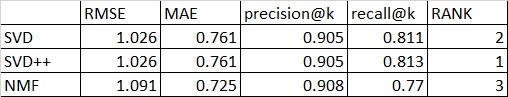

## 7.0 Similarity Modules

### 7.1 Cosine 

Since there are not many parameters to be tested for a similarity module, we can simple set up model and cross validate them with K folds, the code below computes the RMSE and MAE result plus their fir and test running time.
As RMSE and MAE results are similar for 5 folds, we can specify that there are not much skewness for the dataset.

The documentation for Cosine Similarity could be refered to https://surprise.readthedocs.io/en/stable/similarities.html.

In [12]:
sim_options = {'name': 'cosine', 'user_based': True} # or item based
algo = KNNBaseline(sim_options=sim_options)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0784  1.0823  1.0870  1.0922  1.0774  1.0834  0.0055  
MAE (testset)     0.7329  0.7374  0.7406  0.7436  0.7340  0.7377  0.0040  
Fit time          56.16   39.71   37.86   49.28   51.47   46.90   7.01    
Test time         6.67    5.26    5.82    17.77   24.70   12.04   7.83    


{'test_rmse': array([1.0783779 , 1.08227754, 1.08699993, 1.09216788, 1.07736198]),
 'test_mae': array([0.73291287, 0.73739632, 0.74062557, 0.743558  , 0.73401151]),
 'fit_time': (56.155582666397095,
  39.71407198905945,
  37.8609938621521,
  49.281150341033936,
  51.465123653411865),
 'test_time': (6.668757915496826,
  5.258706569671631,
  5.8187549114227295,
  17.768627882003784,
  24.7015438079834)}

We can also view their ***precision@k and recall@k*** could be computed with 5 folds. Also their results are very close.

In [6]:
kf = KFold(n_splits=5)

sim_options = {'name': 'cosine', 'user_based': True} # or item based
algo = KNNBaseline(sim_options=sim_options)
i = 0

#print precision@k and recall@k
for trainset, testset in kf.split(data):
    
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print('precision@k for folder ' + str(i) )
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall@k for folder ' + str(i) )
    print(sum(rec for rec in recalls.values()) / len(recalls))
    i += 1

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 0
0.8972336797474505
recall@k for folder 0
0.7894170755786297
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 1
0.8965940148365921
recall@k for folder 1
0.7887532228174912
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 2
0.8953241833360075
recall@k for folder 2
0.7938544364888187
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 3
0.8972271393212107
recall@k for folder 3
0.7900970338754776
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 4
0.8977145582904051
recall@k for folder 4
0.7926231123169162


Lastly , save the model on local disk for future reuse.

In [24]:
#save the model for later use
dump.dump(os.path.expanduser("KNN_COSINE"), algo=algo)

### 7.2 MSD

In [19]:
sim_options = {'name': 'MSD'} # or item based
algo = KNNBaseline(sim_options=sim_options)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1360  1.1336  1.1537  1.1467  1.1570  1.1454  0.0093  
MAE (testset)     0.8828  0.8814  0.8930  0.8928  0.8906  0.8881  0.0050  
Fit time          21.48   27.31   22.30   23.24   19.16   22.70   2.67    
Test time         2.63    5.49    0.38    0.29    0.24    1.81    2.05    


{'test_rmse': array([1.13599701, 1.13363888, 1.15374848, 1.14666775, 1.15702022]),
 'test_mae': array([0.88284042, 0.88136329, 0.89303263, 0.89279828, 0.89063554]),
 'fit_time': (21.482598304748535,
  27.30842423439026,
  22.300490140914917,
  23.240918397903442,
  19.16305136680603),
 'test_time': (2.630727529525757,
  5.493117570877075,
  0.37982630729675293,
  0.2926371097564697,
  0.2430715560913086)}

In [22]:
kf = KFold(n_splits=5)

sim_options = {'name': 'MSD', 'user_based': True} # or item based
algo = KNNBaseline(sim_options=sim_options)
i = 0

#print precision@k and recall@k
for trainset, testset in kf.split(data):
    
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print('precision@k for folder ' + str(i) )
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall@k for folder ' + str(i) )
    print(sum(rec for rec in recalls.values()) / len(recalls))
    i += 1

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 0
0.8134772546467058
recall@k for folder 0
0.9491514187218244
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 1
0.8203731939301532
recall@k for folder 1
0.9502572320585825
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 2
0.8250599781897492
recall@k for folder 2
0.9467056135431271
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 3
0.8256843625857709
recall@k for folder 3
0.9519847288861373
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 4
0.8158126181130979
recall@k for folder 4
0.9547826718999854


In [23]:
#save the model for later use
dump.dump(os.path.expanduser("KNN_MSD"), algo=algo)

### 7.3 Pearson

In [24]:
sim_options = {'name': 'pearson', 'user_based': True} # or item based
algo = KNNBaseline(sim_options=sim_options)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1689  1.1552  1.1569  1.1645  1.1546  1.1600  0.0057  
MAE (testset)     0.9121  0.9028  0.9035  0.9126  0.9003  0.9063  0.0051  
Fit time          6.63    6.86    6.50    6.84    6.98    6.76    0.17    
Test time         0.04    0.04    0.04    0.04    0.04    0.04    0.00    


{'test_rmse': array([1.16887205, 1.1552452 , 1.1568599 , 1.16450939, 1.1546434 ]),
 'test_mae': array([0.91213912, 0.90281732, 0.90347463, 0.91255526, 0.9003046 ]),
 'fit_time': (6.631256818771362,
  6.856691122055054,
  6.504576683044434,
  6.835744142532349,
  6.9752137660980225),
 'test_time': (0.037899017333984375,
  0.036899566650390625,
  0.03789806365966797,
  0.04185605049133301,
  0.038863420486450195)}

In [25]:
kf = KFold(n_splits=5)

sim_options = {'name': 'pearson', 'user_based': True} # or item based
algo = KNNBaseline(sim_options=sim_options)
i = 0

#print precision@k and recall@k
for trainset, testset in kf.split(data):
    
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print('precision@k for folder ' + str(i) )
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall@k for folder ' + str(i) )
    print(sum(rec for rec in recalls.values()) / len(recalls))
    i += 1

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
precision@k for folder 0
0.8158300738809214
recall@k for folder 0
0.9580733532004718
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
precision@k for folder 1
0.8260174102285093
recall@k for folder 1
0.9514689880304679
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
precision@k for folder 2
0.8216140732680449
recall@k for folder 2
0.948627908181771
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
precision@k for folder 3
0.8268075319821762
recall@k for folder 3
0.949566982894926
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
precision@k for folder 4
0.8195595290013084
recall@k for folder 4
0.9485277829695623


In [26]:
#save the model for later use
dump.dump(os.path.expanduser("KNN_PEARSON"), algo=algo)

### 7.4 Comparison with Similarity Modules

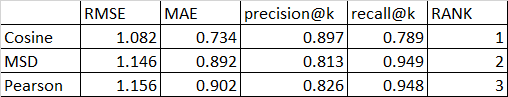

## 8.0 Top N Recommender 

### 8.1 Get Top N Items 

This approach is based on the the top-10 items with highest rating prediction for each user in the dataset. The input could be user rating to different itmes (i.e. 20 items), then , it will return top 10 best prediction items.

Below is a simple example showing the input and output for the top 10 items with ID and prediction value recommended for a user based on its prediction model

In [35]:
df = pd.read_csv('full_dataset.csv')
_, prediction_algo = dump.load(os.path.expanduser('SVD_GS_BEST_RMSE'))

# userID is 'ALOXOO497B4LH'
test = df[df['userID'] == 'ALOXOO497B4LH']
columnsTitles=["userID","itemID","rating"]
test=test.reindex(columns=columnsTitles)

predictions = prediction_algo.test(np.array(test))

top_n = get_top_n(predictions, n=10)
top_n # return is top 10 recommended items with highest prediction score

defaultdict(list,
            {'ALOXOO497B4LH': [('B00JSSP35C', 5),
              ('B0186D1TYS', 5),
              ('B018F6NSP4', 5),
              ('B01GW3LRD2', 4.9934516721914335),
              ('B0194VWTRM', 4.986915118031065),
              ('B00IFF0SIQ', 4.981101492897001),
              ('B0053BCO00', 4.966267966701362),
              ('B000X1TC0U', 4.953234172755904),
              ('B000X1TC0U', 4.953234172755904),
              ('B00DVPMVIU', 4.952126406293492)]})

### 8.2 Get the k nearest neighbors of a user (or item)

We can use the get_neighbors() methods of the algorithm object. This is only relevant for algorithms that use a ***similarity measure***, such as the k-NN algorithms.

Below is an example where we retrieve the 10 nearest neighbors of one of the video games from the video game review dataset. The output is represneted as 10 rows item ID from the dataset.


In [57]:
df = pd.read_csv('full_dataset.csv')
_, knn_algo = dump.load(os.path.expanduser('KNN_COSINE'))

i = 0 
for item in df['userID'].unique():
    if item == 'A1JGAP0185YJI6':
        break
    i += 1
    
toy_k_neighbors = knn_algo.get_neighbors(i, k=10)

items = []
for e in toy_k_neighbors:
    items.append(df.iloc[int(e)]['itemID'])
items        

['0700026657',
 '0700026398',
 '0700099867',
 '0700099867',
 '0700099867',
 '0804161380',
 '0804161380',
 '0804161380',
 '0804161380',
 '3828770193']

## 9.0 Recommender Engine in System Architecture 

In accordance with this graph, this is a classic system architecture for a commercial web application based on technical stack Spring Framework in JAVA language, https://spring.io/. 

The graph is sourced from ***mall*** , an open source online shop platform project with a distributed system architecture, https://github.com/macrozheng/mall. It has the following components:

***API gateway*** - it can take care of securing and routing messages, hiding services, and integrated with many other services in the system.

***Service registry*** - applications can’t always know the exact location of other services, if they need to make inter process communications, Service registry should be checked first to find other services addresses.

***Circuit breakers*** - distributed systems can be unreliable. Requests might encounter timeouts or fail completely. In high concurrency environment, it could provide function to throttling load.

***Load Ballancers*** - it provides functions that load requests evenly to different services with same functions, that improves stability to the system. 

***Microservices*** - building small and fine, self-contained, ready to run applications, that can bring great flexibility and added resilience to the system. It is a modern approach to software whereby application code is delivered in small, manageable pieces, weak coupling with others, which can lead to many additional benefits, such as easier maintenance, improved productivity, greater fault tolerance, better business alignment, and more. 

***Cloud configuration*** - normally configuration can’t simply be embedded inside the application/micro services, while it has to be flexible enough to cope with multiple applications, environments, and service instances, as well as deal with dynamic changes without downtime in order to keep the configurations safe.

***Message Queues*** - a form of asynchronous service-to-service communication used in serverless and microservices architectures. Messages are stored on the queue until they are processed and deleted. Each message is processed only once, by a single consumer. Message queues can be used to decouple heavyweight processing, to buffer or batch work, and to smooth spiky workloads.

***Databases*** - store all the information and records.

***Log system*** - store all the operational logs/records that occur in the system.

***Deployment tools*** - deployment automation tool stack that containerizing services/apps in a sandbox/virtual machine and deploy them onto the real machine.

Our recommender engine would include some microservices being embedded in this complex system, which is connected with all the components as above. However, it has weak coupling with other microservices.

A typical process would be that a request needs to be checked at ***API gateway*** for its security/identification, secondly, it looks up the ip address of recommender engine cluster at ***Service registry***, then it is forwarded onto one of recommender engine server through message queue and load balancer system for processing , and lastly, the recommended items of this request are returned to the front end browser for viewing and recorded at the ***Log system*** for maintenance and debugging purpose.

In terms of recommender engine cluster, Availability and Partition tolerance have been implemented in accordance with ***CAP theorem***, which implies that in the presence of a network partition, one has to choose between consistency and availability, as per https://en.wikipedia.org/wiki/CAP_theorem. 

In this case, we have pushed a static model and database for online recommender engine, which makes the system stateless. Thus, its microservices could be duplicated as much as we needs in order to deal with fault tolerance and high concurrency situation through load balancers, i.e. Black Friday Sales or Shopping Holidays for famous commercial web apps such as Amazon , Ebay, Taobao, Alibaba etc. 

Also, the online environment and database are updating dynamically, we need gap to train and test both online and offline models so as to undertake research and improvements.

Therefore, Availability and Partition tolerance (AP) is the most common choice for system architecture of recommender engine.


## 10.0 Presentation of Web App